# Eigen Vectors of a Straight Line Fit 

The eigen vectors of a matrix representing data points on a straight line, are a vector pointing in the direction of the line and a vector perpendicular to it. The eigen value of the vector along the line is best constrainted and the eigen value perpendicular is little constrained to not constrained at all depending on the uncertainity in the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


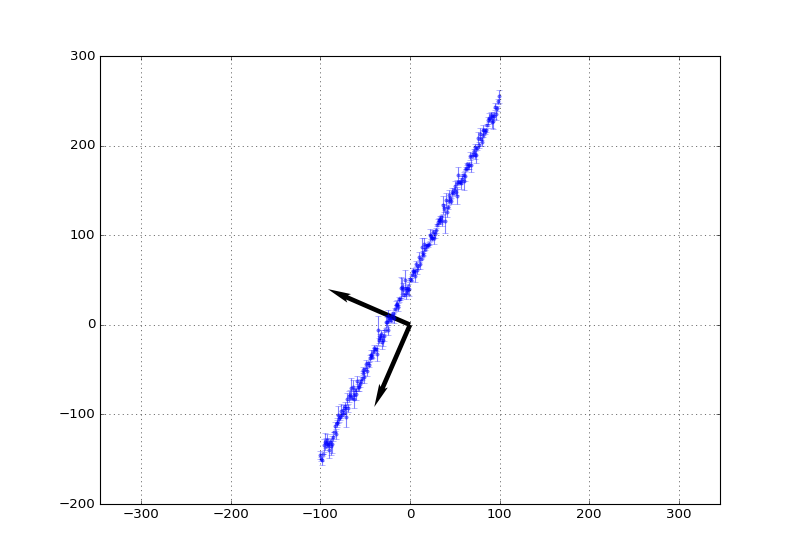

In [2]:
# Generate data
datapoints = 200

x = np.linspace(-100,99,num=datapoints)
n = np.random.normal(scale=5,size=datapoints)
y = 2*x + 50 + n

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.errorbar(x,y,yerr=n,fmt='.',alpha=0.5)
plt.show()

In [3]:
# Generating N as some noise times the identity matrix
# -- all the noise is drawn from the same distribution.
# Scaling factor is the variance of the distribution 
# the noise was drawn from.
N = 25*np.identity(datapoints)
Ninv = np.linalg.inv(N)

In [4]:
A = np.transpose(np.matrix([x,y]))
Y = np.transpose(np.matrix(np.ones(datapoints)))
print Ninv.shape, A.shape, Y.shape

(200, 200) (200, 2) (200, 1)


In [8]:
# Since A is real, dagger is just transpose.

x1 = np.linalg.inv(np.dot(A.T,np.dot(Ninv,A)))
x2 = np.dot(A.T,np.dot(Ninv,Y))
X = np.dot(x1,x2)
print X

[[-0.03922728]
 [ 0.01969572]]


In [9]:
# Define matrix M as params averaged over all measurements
M = np.dot(A.T,A)
print M

[[  666700.          1322765.7818912 ]
 [ 1322765.7818912   3134641.00654351]]


In [11]:
U,s,V = np.linalg.svd(M)
print U, s, V

[[-0.39866167 -0.91709807]
 [-0.91709807  0.39866167]] [ 3709646.04669045    91694.95985306] [[-0.39866167 -0.91709807]
 [-0.91709807  0.39866167]]


In [12]:
idxs = np.array([[0,0,U.item((0,0)),U.item((1,0))],[0,0,U.item((0,1)),U.item((1,1))]])
Xq,Yq,Uq,Vq = zip(*idxs)

plt.axis('equal')
plt.quiver(Xq,Yq,Uq,Vq,headwidth=2,scale=.01,units='xy')
plt.grid()